#### Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition

Part I. The Fundamentals of Machine Learning

Example 1-1. Training and running a linear model using Scikit-Learn

In [7]:
#import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn.linear_model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [8]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/oecd_bli_2015.csv"


In [9]:
life_sat = pd.read_csv(url, thousands=',')
life_sat.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [10]:
life_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null   float64
 15  Flag

In [11]:
set_per_capita = "https://github.com/ageron/handson-ml/blob/master/datasets/lifesat/gdp_per_capita.csv"

In [12]:
 gdp_per_capita = gdp_per_capita = pd.read_csv(
        "./DataSets/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [13]:
#gdp_per_capita.set_index('Country', inplace=True, drop=True)

In [14]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [15]:
def prepare_country_stats(life_sat, gdp_per_capita):
    life_sat = life_sat[life_sat["INEQUALITY"] == "TOT"]
    life_sat = life_sat.pivot(
        index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=life_sat, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
 
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
 

In [16]:
# Prepare the data
country_stats = prepare_country_stats(life_sat, gdp_per_capita)


In [17]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

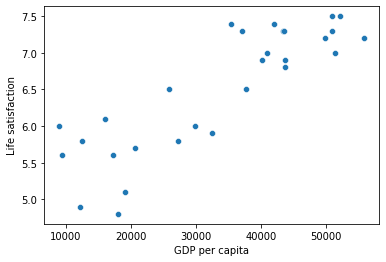

In [18]:
sns.scatterplot(x=country_stats['GDP per capita'], y=country_stats['Life satisfaction'])

In [19]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]


In [20]:
y = np.c_[country_stats["Life satisfaction"]]

In [21]:
print(X)
print(X.shape)

[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]
(29, 1)


In [97]:
print(y)
print(y.shape)

[[6. ]
 [5.6]
 [4.9]
 [5.8]
 [6.1]
 [5.6]
 [4.8]
 [5.1]
 [5.7]
 [6.5]
 [5.8]
 [6. ]
 [5.9]
 [7.4]
 [7.3]
 [6.5]
 [6.9]
 [7. ]
 [7.4]
 [7.3]
 [7.3]
 [6.9]
 [6.8]
 [7.2]
 [7.5]
 [7.3]
 [7. ]
 [7.5]
 [7.2]]
(29, 1)


<AxesSubplot:xlabel='GDP per capita', ylabel='Life satisfaction'>

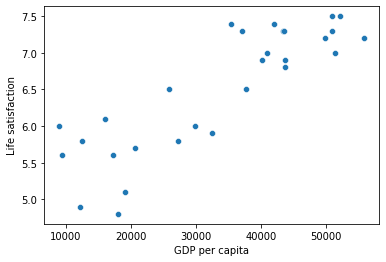

In [128]:
sns.scatterplot(data= country_stats, x="GDP per capita", y="Life satisfaction")


In [162]:
#Split dataset, train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [163]:
#create model Linear_Regression object
model = sklearn.linear_model.LinearRegression()

#Train the model
model = model.fit(X_train, y_train)

In [164]:
model.intercept_

array([4.86738381])

In [165]:
model.coef_

array([[4.9184703e-05]])

In [133]:
# Check model with the test_values
predictions = model.predict(X_test)

In [134]:
predictions

array([[7.43060354],
       [6.84001659],
       [6.46517569],
       [7.0202321 ],
       [5.88710478],
       [6.13953243]])

In [135]:
y_test - predictions

array([[ 0.06939646],
       [ 0.05998341],
       [-0.56517569],
       [-0.2202321 ],
       [-0.18710478],
       [ 0.36046757]])

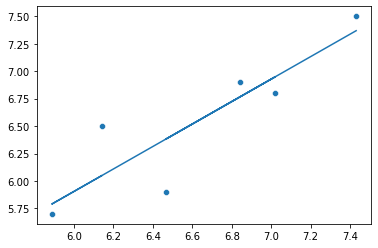

In [136]:
#scatterplot de predicciones y reales
sns.scatterplot(x=predictions.flatten(), y=y_test.flatten() )
m, b = np.polyfit(np.array(predictions.flatten()), np.array(y_test.flatten()), 1)
plt.plot(np.array(predictions.flatten()), m*(np.array(predictions.flatten())) + b)

In [137]:

RMSE = np.sqrt(mean_squared_error(y_test, predictions)) 
#Error medio absoluto
print('MAE:',mean_absolute_error(y_test, predictions))
#Error cuardtático medio
print('MSE:',mean_squared_error(y_test, predictions))
#El cuatrado del error cuadrático medio
print('RMSE:',np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.24372666833869946
MSE: 0.09021411430745645
RMSE: 0.30035664518611277


In [138]:
# Make a prediction for Cyprus
X_new = np.c_[22587]  # Cyprus's GDP per capita
print(model.predict(X_new)) 

[[5.9783187]]


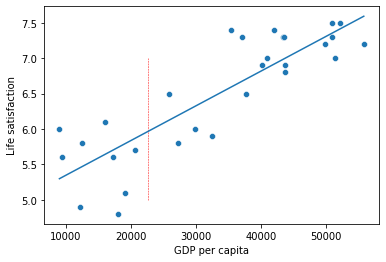

In [159]:
sns.scatterplot(data= country_stats, x="GDP per capita", y="Life satisfaction")
m, b = np.polyfit(np.array(country_stats['GDP per capita']), np.array(country_stats['Life satisfaction']), 1)
plt.plot(np.array(np.array(country_stats['GDP per capita'])), m*(np.array(country_stats['GDP per capita'])) + b)
#draw vertical line in GDP_per_capita_Cyprus
plt.vlines(22587, ymin=5, ymax=7, linestyles='--', colors='r', linewidth= 0.5)

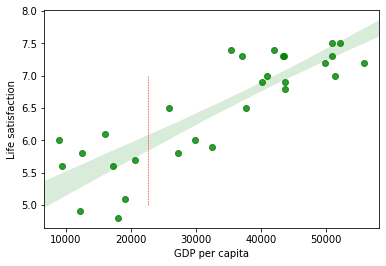

In [160]:
sns.regplot(data= country_stats, x="GDP per capita", y="Life satisfaction", ci=68, truncate=False, color='g')
plt.vlines(22587, ymin=5, ymax=7, linestyles='--', colors='r', linewidth= 0.5)

In [67]:
country_stats.describe()

,GDP per capita,Life satisfaction
count,29.000000,29.000000
mean,33391.749138,6.493103
std,14650.076056,0.839613
min,9054.914000,4.800000
25%,19121.592000,5.800000
50%,37044.891000,6.800000
75%,43724.031000,7.300000
max,55805.204000,7.500000


In [142]:
country_stats[country_stats.index == 'Cyprus']

,GDP per capita,Life satisfaction
Country,,


In [143]:
country_stats[country_stats.index == 'Slovenia']

,GDP per capita,Life satisfaction
Country,,
Slovenia,20732.482,5.7


In [147]:
country_stats[(19000 < country_stats['GDP per capita']) & (country_stats['GDP per capita'] < 27500)]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5
Korea,27195.197,5.8


In [77]:
country_stats['GDP per capita'].sort_values()

Country
Russia              9054.914
Turkey              9437.372
Hungary            12239.894
Poland             12495.334
Slovak Republic    15991.736
Estonia            17288.083
Greece             18064.288
Portugal           19121.592
Slovenia           20732.482
Spain              25864.721
Korea              27195.197
Italy              29866.581
Japan              32485.545
Israel             35343.336
New Zealand        37044.891
France             37675.006
Belgium            40106.632
Germany            40996.511
Finland            41973.988
Canada             43331.961
Netherlands        43603.115
Austria            43724.031
United Kingdom     43770.688
Sweden             49866.266
Iceland            50854.583
Australia          50961.865
Ireland            51350.744
Denmark            52114.165
United States      55805.204
Name: GDP per capita, dtype: float64

In [149]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=4)
model = model.fit(X_train,y_train)
model.predict(X_new)

array([[5.325]])

In [ ]:
https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch02.html#project_chapter